In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from datetime import date
    
df = pd.read_csv('../../data/imp_exp_prod_flat_all.csv')
df.drop(columns='Row Number', inplace=True)
df = df[['Area', 'Item', 'Year', 'Production', 'Import Quantity', 'Export Quantity']]
df.rename(columns={'Area': 'Country', 'Item':'Produce', 'Production':'Production Quantity'}, inplace=True)
df.head()

,Country,Produce,Year,Production Quantity,Import Quantity,Export Quantity
0,Armenia,Potatoes,2000,290260.0,390.0,300.0
1,Armenia,Potatoes,2001,363834.0,2290.0,0.0
2,Armenia,Potatoes,2002,374263.0,1918.0,0.0
3,Armenia,Potatoes,2003,507518.0,2853.0,7.0
4,Armenia,Potatoes,2004,576427.0,1553.0,0.0


In [2]:
# create a lookup table for countries and their centroid locations
lookup = pd.read_csv('../../data/country_centroids.csv')
lookup.rename(columns={'country':'code'}, inplace=True)
lookup.index = lookup['name']
(lookup.drop(columns=['name'])).to_csv('../../data/countries_lookup.csv')


# FIXME --------------------------------------------------------------------------
# ********************************************************************************
# Assuming that China is a sum of mainland, taiwan, hong kong and macao
# 'Serbia and Montenegro' - set coordinates to average of Serbia and Montenegro
# 'South Sudan' and 'Sudan (former)'- set coordinates to Sudan's coordinates

# print regions that are not present in the countries lookup table
set(df[~df['Country'].isin(lookup['name'])]['Country'])

{'Africa',
 'Americas',
 'Asia',
 'Australia & New Zealand',
 'Caribbean',
 'Central America',
 'Central Asia',
 'China',
 'Eastern Africa',
 'Eastern Asia',
 'Eastern Europe',
 'Europe',
 'European Union',
 'Land Locked Developing Countries',
 'Least Developed Countries',
 'Low Income Food Deficit Countries',
 'Melanesia',
 'Middle Africa',
 'Net Food Importing Developing Countries',
 'Northern Africa',
 'Northern America',
 'Northern Europe',
 'Occupied Palestinian Territory',
 'Oceania',
 'Polynesia',
 'Small Island Developing States',
 'South America',
 'South-Eastern Asia',
 'Southern Africa',
 'Southern Asia',
 'Southern Europe',
 'Western Africa',
 'Western Asia',
 'Western Europe',
 'World'}

In [3]:
# remove the regions printed above from the dataframe
df = df[df['Country'].isin(lookup.index)]

# randomly print 10 entries from the dataframe for an example of what it contains
df.sample(n=10)

,Country,Produce,Year,Production Quantity,Import Quantity,Export Quantity
152365,Greece,Cottonseed,2004,645000.0,4989.0,180988.0
45739,Serbia and Montenegro,Grapes,2001,416000.0,6422.0,335.0
158026,Hungary,"Vegetables, fresh nes",2005,80000.0,3070.0,8483.0
158431,Hungary,Millet,2005,15387.0,184.0,8240.0
22399,Malta,Lettuce and chicory,2004,2712.0,172.0,0.0
34362,Pakistan,Spinach,2006,84771.0,0.0,0.0
84486,Algeria,Wheat,2014,2436197.0,7417000.0,27.0
73518,Yemen,"Tobacco, unmanufactured",2016,24070.0,6829.0,0.0
34238,Pakistan,Sunflower seed,2011,404391.0,158955.0,2.0
146871,France,"Roots and tubers, nes",2004,35990.0,6080.0,1341.0


In [10]:
def getMaximumQuantity(selectedData):
    maxRow = selectedData.nlargest(1, ['Production Quantity', 'Import Quantity', 'Export Quantity'])
    return int(maxRow.loc[:,['Production Quantity', 'Import Quantity', 'Export Quantity']].max(axis=1))
    
timeObject = {}
countrySet = sorted(set(df['Country']))
print(len(countrySet))
for country in countrySet:
    print(country)
    countryObject = {}
    
    produceSet = sorted(set((df[df['Country'] == country])['Produce']))
    for produce in produceSet:
        produceObject = {}
        selected = df[(df['Country'] == country) & (df['Produce'] == produce)]
        
        # save the available years and production, import and export quantities for each produce in each year
        produceObject['available_years'] = sorted(set(selected['Year']))
        produceObject['Production'] = []
        produceObject['Imports'] = []
        produceObject['Exports'] = []
        
        for year in produceObject['available_years']:
            currentYearData = (selected[selected['Year'] == year])
            (produceObject['Production']).append({'year': date(year, 1, 1).year, 'quantity': int(currentYearData['Production Quantity'])})
            (produceObject['Imports']).append({'year': date(year, 1, 1).year, 'quantity': int(currentYearData['Import Quantity'])})
            (produceObject['Exports']).append({'year': date(year, 1, 1).year, 'quantity': int(currentYearData['Export Quantity'])})
            
        countryObject[produce] = produceObject
    
    timeObject[country] = countryObject 

199
Afghanistan
Albania
Algeria
American Samoa
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China, Hong Kong SAR
China, Macao SAR
China, Taiwan Province of
China, mainland
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Croatia
Cuba
Cyprus
Czechia
C�te d'Ivoire
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic R

In [11]:
json.dump(timeObject, open('../../data/time_analysis.json', 'w'))

['#f77189', '#50b131', '#3ba3ec']

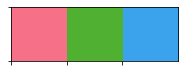

In [12]:
# generate colors for the line chart
barChartPalette = sns.color_palette('husl', 3)
sns.palplot(barChartPalette)
barChartPalette.as_hex()